In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lr_utils import load_dataset
import h5py

In [ ]:
train_set_x_org,train_set_y,test_set_x_org,test_set_y,classes=load_dataset()

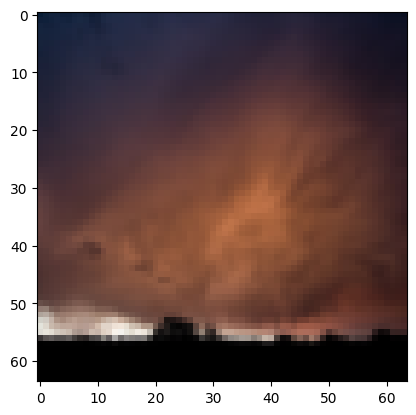

In [ ]:
plt.imshow(train_set_x_org[208])

In [ ]:
print(train_set_y[0,208])

0


In [ ]:
print(classes)

[b'non-cat' b'cat']


In [ ]:
train_set_x_flatten=train_set_x_org.reshape(train_set_x_org.shape[1]*train_set_x_org.shape[2]*train_set_x_org.shape[3],train_set_x_org.shape[0])

In [ ]:
print(train_set_x_flatten.shape)

(12288, 209)


In [ ]:
test_set_x_flatten = test_set_x_org.reshape(test_set_x_org.shape[1]*test_set_x_org.shape[2]*test_set_x_org.shape[3],test_set_x_org.shape[0])

In [ ]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [ ]:
def initialize_with_zeroes(dim):
  w=np.zeros((dim,1))
  b=0
  return w,b

In [ ]:
# GRADED FUNCTION: propagate
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """

    m = X.shape[1]

    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T,X) + b)              # compute activation
    cost = np.sum(((- np.log(A))*Y + (-np.log(1-A))*(1-Y)))/m  # compute cost
    ### END CODE HERE ###

    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (np.dot(X,(A-Y).T))/m
    db = (np.sum(A-Y))/m
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [ ]:
def optimize(w , b , X , Y , num_iter , lr , print_cost = False):
  costs=[]

  for i in range(num_iter):
    grads,cost=propagate(w, b, X, Y)
    dw = grads["dw"]
    db = grads["db"]

    w = w - (lr*dw)
    b = b - (lr*db)

    if i%100==0:
      costs.append(cost)
      if(print_cost):
        print("Cost after iter %i: %f" %(i, cost))

    #  Print cost after every 100 iterations

  plt.plot(costs)
  plt.ylabel('cost')
  plt.xlabel('iterations')
  plt.show()

  parameters={"w":w, "b":b}
  grads={"dw":dw, "db":db}
  return parameters,grads,costs

  # Note that both params and grads are dicts, costs is a list


In [ ]:
def predict(w,b,X):
  m=X.shape[1]
  Y_predicted=np.zeros((1,m))
  w=w.reshape(X.shape[0],1)

  A=sigmoid(np.dot(w.T,X)) + b
  Y_predicted=(A>=0.5) * 1.0

  return Y_predicted


In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iter=2000, lr=0.5, print_cost=False):
  w,b=initialize_with_zeroes(X_train.shape[0])
  params,grads,cost=optimize(w,b,X_train, Y_train, num_iter, lr, print_cost)
  w=params["w"]
  b=params["b"]

  Y_prediction_train=predict(w,b,X_train)
  Y_prediction_test=predict(w,b,X_test)

  # Calculating train,test accuracies
  temp = Y_prediction_train-Y_train
  temp=np.abs(temp)
  temp=np.mean(temp)
  temp=temp*100

  temp=100-temp

  temp2 = Y_prediction_test-Y_test
  temp2=np.abs(temp2)
  temp2=np.mean(temp2)
  temp2=temp2*100

  temp2=100-temp2

  print("Train accuracy: ", temp)
  print("Test accuracy: ",temp2)


Cost after iter 0: 0.693147
Cost after iter 100: 0.709726
Cost after iter 200: 0.657712
Cost after iter 300: 0.614611
Cost after iter 400: 0.578001
Cost after iter 500: 0.546372
Cost after iter 600: 0.518331
Cost after iter 700: 0.492852
Cost after iter 800: 0.469259
Cost after iter 900: 0.447139
Cost after iter 1000: 0.426262
Cost after iter 1100: 0.406617
Cost after iter 1200: 0.388723
Cost after iter 1300: 0.374678
Cost after iter 1400: 0.365826
Cost after iter 1500: 0.358532
Cost after iter 1600: 0.351612
Cost after iter 1700: 0.345012
Cost after iter 1800: 0.338704
Cost after iter 1900: 0.332664
Cost after iter 2000: 0.326870
Cost after iter 2100: 0.321305
Cost after iter 2200: 0.315951
Cost after iter 2300: 0.310795
Cost after iter 2400: 0.305822
Cost after iter 2500: 0.301023
Cost after iter 2600: 0.296386
Cost after iter 2700: 0.291901
Cost after iter 2800: 0.287560
Cost after iter 2900: 0.283354
Cost after iter 3000: 0.279278
Cost after iter 3100: 0.275323
Cost after iter 3200

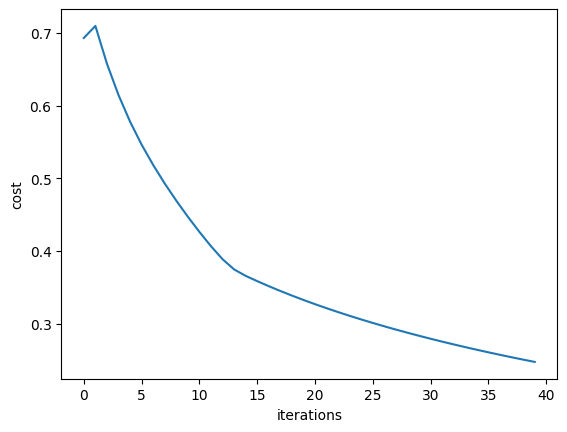

Train accuracy:  97.12918660287082
Test accuracy:  34.0


In [ ]:
model1=model(train_set_x,train_set_y,test_set_x,test_set_y,num_iter=4000,lr=0.005,print_cost=True)